# 🚀 Visualizing Token Embeddings & Self-Attention in LLMs
### 📌 This notebook will demonstrate how a Large Language Model (LLM) processes text **visually**, covering:
- ✅ Tokenization (Converting text into Token IDs)
- ✅ Embedding Layer (Mapping tokens to dense vectors)
- ✅ Positional Encoding (Adding order information)
- ✅ Self-Attention (Visualizing Attention Scores)
- ✅ Multi-Head Attention & Feedforward Networks


In [ ]:
# Install required libraries
!pip install transformers numpy torch matplotlib seaborn

In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer
import math

## 🔹 Tokenization: Converting Text into Token IDs
We'll tokenize the sentence into Token IDs using a pre-trained tokenizer.

In [11]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("gpt2")
tokens = tokenizer.tokenize("Let's learn more about how LLMs work")
print(tokens)

['Let', "'s", 'Ġlearn', 'Ġmore', 'Ġabout', 'Ġhow', 'ĠLL', 'Ms', 'Ġwork']


In [13]:
import tiktoken

tokenizer = tiktoken.encoding_for_model("gpt-4")
text = "I want to learn about LLMs"
tokens = tokenizer.encode(text)

print("Token IDs:", tokens) # [40, 1390, 311, 4048, 922, 445, 11237, 82]
print("Decoded Tokens:", [tokenizer.decode([t]) for t in tokens])
#['I', ' want', ' to', ' learn', ' about', ' L', 'LM', 's']

Token IDs: [40, 1390, 311, 4048, 922, 445, 11237, 82]
Decoded Tokens: ['I', ' want', ' to', ' learn', ' about', ' L', 'LM', 's']


In [3]:
# Load a tokenizer (GPT-2 as an example)
tokenizer = AutoTokenizer.from_pretrained('gpt2')

# Define sample text
text = "The cat sat on the mat"
tokens = tokenizer.tokenize(text)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print("🔹 Tokens:", tokens)
print("🔹 Token IDs:", token_ids)

🔹 Tokens: ['The', 'Ġcat', 'Ġsat', 'Ġon', 'Ġthe', 'Ġmat']
🔹 Token IDs: [464, 3797, 3332, 319, 262, 2603]


## 🔹 Embedding Layer: Mapping Token IDs to Dense Vectors
Each token ID is mapped to a vector in a high-dimensional space.
### 📌 **Visualization:** We'll plot the embeddings using heatmaps.

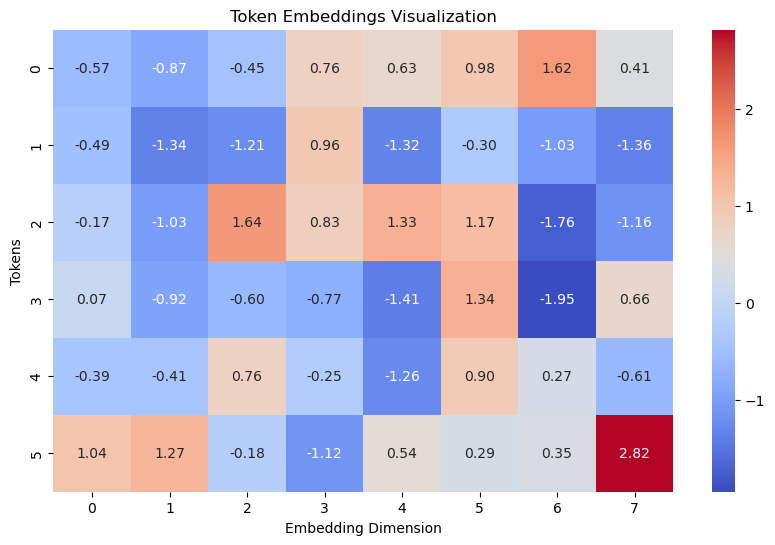

In [4]:
# Define an embedding layer (Embedding size = 8 for demonstration)
embedding_layer = nn.Embedding(num_embeddings=tokenizer.vocab_size, embedding_dim=8)
embedded_tokens = embedding_layer(torch.tensor(token_ids))

# Convert embeddings to numpy for visualization
embeddings_np = embedded_tokens.detach().numpy()

# Plot heatmap of token embeddings
plt.figure(figsize=(10, 6))
sns.heatmap(embeddings_np, annot=True, cmap='coolwarm', fmt='.2f')
plt.xlabel('Embedding Dimension')
plt.ylabel('Tokens')
plt.title('Token Embeddings Visualization')
plt.show()

## 🔹 Positional Encoding: Adding Order Information
Since Transformers process words in parallel, positional encoding ensures word order is retained.
### 📌 **Visualization:** We'll plot the sine/cosine encoding matrix.

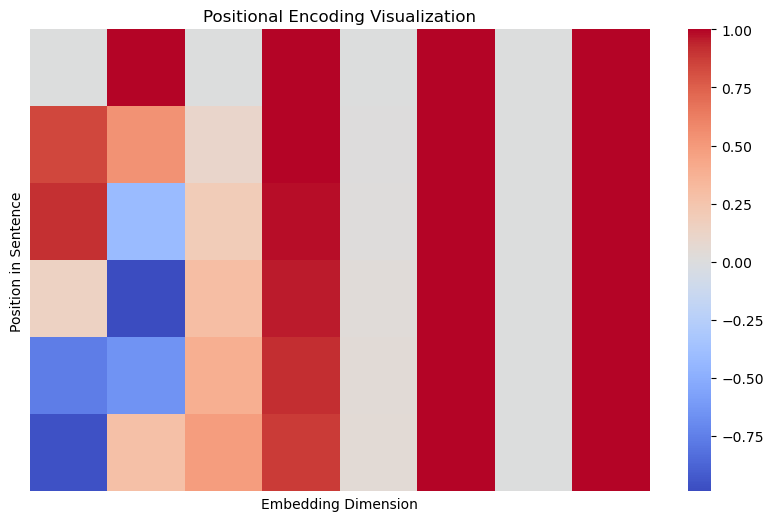

In [5]:
def positional_encoding(seq_length, d_model):
    pe = np.zeros((seq_length, d_model))
    for pos in range(seq_length):
        for i in range(0, d_model, 2):
            pe[pos, i] = math.sin(pos / (10000 ** (i / d_model)))
            pe[pos, i + 1] = math.cos(pos / (10000 ** (i / d_model)))
    return torch.tensor(pe, dtype=torch.float32)

# Apply positional encoding
pos_encoding = positional_encoding(len(token_ids), 8).numpy()

# Plot positional encoding matrix
plt.figure(figsize=(10, 6))
sns.heatmap(pos_encoding, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.xlabel('Embedding Dimension')
plt.ylabel('Position in Sentence')
plt.title('Positional Encoding Visualization')
plt.show()

## 🔹 Self-Attention: Visualizing Attention Scores
We'll compute and visualize the attention matrix.

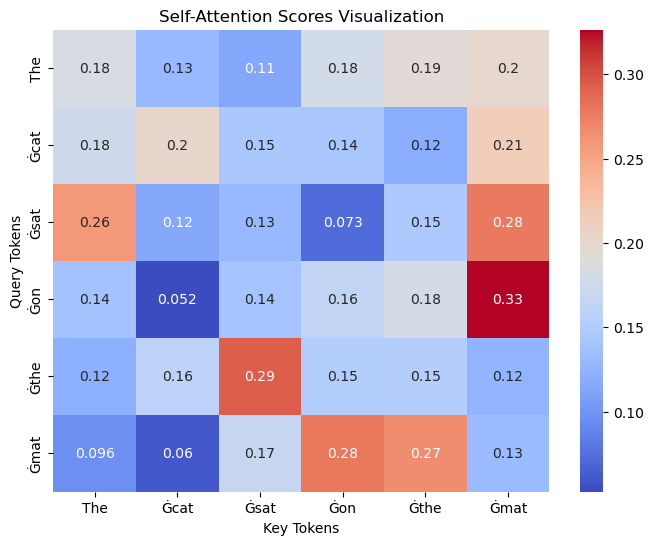

In [6]:
d_model = 8  # Embedding dimension

# Define Q, K, V transformation matrices
W_Q = nn.Linear(d_model, d_model)
W_K = nn.Linear(d_model, d_model)
W_V = nn.Linear(d_model, d_model)

# Compute Q, K, V
Q = W_Q(embedded_tokens)
K = W_K(embedded_tokens)
V = W_V(embedded_tokens)

# Compute Attention Scores (Scaled Dot Product)
scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(d_model)
attention_weights = torch.nn.functional.softmax(scores, dim=-1).detach().numpy()

# Plot attention heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(attention_weights, cmap='coolwarm', xticklabels=tokens, yticklabels=tokens, annot=True)
plt.xlabel('Key Tokens')
plt.ylabel('Query Tokens')
plt.title('Self-Attention Scores Visualization')
plt.show()

## 🎯 Summary: Visualizing LLM Processing Steps
- ✅ **Tokenization:** Convert text into token IDs.
- ✅ **Embeddings:** Map tokens into dense numerical vectors (visualized with heatmaps).
- ✅ **Positional Encoding:** Adds order information using sine & cosine waves.
- ✅ **Self-Attention:** Computes relationships between words (visualized with attention heatmaps).

🚀 **These visualizations make it easier to understand what happens inside a Transformer model!**

## 🔹 Visualizing Token Embeddings & Attention Weights
To better understand the transformations, we'll use **matplotlib** to visualize:
- **Token Embeddings** (Using PCA to reduce dimensions to 2D)
- **Attention Weights** (Heatmap for attention scores between tokens)


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


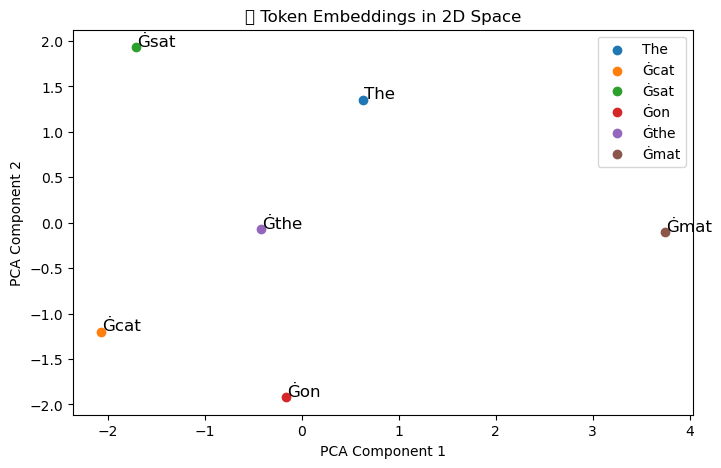

In [7]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce Embedding Dimensions for Visualization
pca = PCA(n_components=2)
embedded_tokens_np = embedded_tokens.detach().numpy()
embedded_tokens_2d = pca.fit_transform(embedded_tokens_np)

# Plot the embeddings
plt.figure(figsize=(8, 5))
for i, word in enumerate(tokens):
    plt.scatter(embedded_tokens_2d[i, 0], embedded_tokens_2d[i, 1], label=word)
    plt.text(embedded_tokens_2d[i, 0]+0.01, embedded_tokens_2d[i, 1]+0.01, word, fontsize=12)
plt.title('📊 Token Embeddings in 2D Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

## 🔹 Attention Weights Heatmap
The attention scores determine how much each token **attends to every other token**.

In [8]:
# Convert attention weights to numpy for visualization
attention_weights_np = attention_weights.detach().numpy()

# Plot heatmap of attention scores
plt.figure(figsize=(8, 6))
sns.heatmap(attention_weights_np[0], annot=True, cmap='coolwarm', xticklabels=tokens, yticklabels=tokens)
plt.title('🔍 Attention Weight Heatmap')
plt.xlabel('Key Tokens')
plt.ylabel('Query Tokens')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'detach'